In [1]:
import pandas as pd
import datacompy
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

import numpy as np
import mplhep as hep
plt.style.use(hep.style.CMS)

In [2]:
# Function to get chamber name from the dpid. 
# The first argument is the  csv file with the data obtained from the dbeaver
# The second argument is the DPID-chamber mapping
def convert_dpid_name(df_data, df_mapping):
    
    # Take df colums to numpy array
    k = df_mapping['DPID2'].to_numpy()
    v = df_mapping['CHAMBER_NAME'].to_numpy()
    
    # Convert both arrays to a dict.
    dicmap =  dict(zip(k, v))
    
    # Takes the chamber names from the mapping file and add it in a new column
    # to the data dataframe
    df_data['Chamber_name'] = df_data['DPID'].map(dicmap)
    
    df_data_mapped = df_data
    
    return df_data_mapped

In [3]:
# Function to select an individual wheel.
# The first argument can be ONLY the following: W-2, W-1, W0, W+1, W+2.
# The second argument filter for the desired voltage
# The third one is a default argument that calls the function convert_dpid_name in order to obtain
# the chamber names in the dataframe.
def individual_wheel(wheel, voltage, df_data):
    
    # Filter for select the wished voltage
    df_data = df_data[(df_data.V_APPLIED == voltage)]
    
    # Filter for select the wished wheel
    df_wheel = df_data[np.where(df_data['Chamber_name'].str.find(wheel) == 0, True, False) == True]
    
    return df_wheel
    
    

In [4]:
# Region: RE-, RE+, RE+4, RE-4
def select_endcap(region, voltage, df_data):
    
    # Filter for select the wished voltage
    df_data = df_data[(df_data.V_APPLIED == voltage)]
    
    # Filter for select the wished endcap
    df_endcap = df_data[np.where(df_data['Chamber_name'].str.find(region) == 0, True, False) == True]
    
    '''if region == 'RE-' or region =='RE+':
        df_endcap = df_data[np.where(df_data['Chamber_name'].str.find(region) == 0, True, False) == True]
        df_endcap = df_endcap[np.where(df_endcap['Chamber_name'].str.find('RE+4') != 0, True, False) == True]
        df_endcap = df_endcap[np.where(df_endcap['Chamber_name'].str.find('RE-4') != 0, True, False) == True]
    else:
        df_endcap = df_endcap[np.where(df_endcap['Chamber_name'].str.find('RE+4') == 0, True, False) == True]
        df_endcap = df_endcap[np.where(df_endcap['Chamber_name'].str.find('RE-4') != 0, True, False) == True]'''
        
    return df_endcap              

In [5]:
# Functions to filter the desired dates.
# The first argument is the dataframe with the data
# The second is a array with the desired dates
def filter_current_data(data_required, date):
    
    df_date_to_plot = data_required[np.where(data_required['DATE'].str.find(date) == 0, True, False) == True]
    df_current = df_date_to_plot['AVG_IMON']
    
    return df_current   

In [6]:
def plot(data_to_plot, dates_array, bins=80):
    
    colors = np.array(['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf'])
    handles = []
    labels = []
    
    fig, ax = plt.subplots()
    
    for i, j in enumerate(dates_array):
        
        df_date_to_plot = data_to_plot[np.where(data_to_plot['DATE'].str.find(j) == 0, True, False) == True]
        df_current = df_date_to_plot['AVG_IMON']
        
        if np.isnan(round(df_current.mean(),2)):
            print(f"There is no data available for: {j}")
            continue
                
        histogr = df_current.plot.hist(bins=bins, alpha=1.0, color=colors[i],  histtype='step', linewidth=2, range=(0, 20))  
        
        handles.append(Rectangle((0,0), 1, 1, color=colors[i], ec="k"))
        labels.append(j + f"-mean: {round(df_current.mean(),2)} uA")
        
    
    # Xlabel
    ax.xaxis.set_label_coords(0.90, -0.055)
    ax.set_xlabel(r'$I(\mu A)$', fontsize = 22)
    
    # Ylabel
    ax.yaxis.set_label_coords(-0.09, 0.86)
    ax.set_ylabel('Entries', fontsize = 22)
    plt.legend(handles, labels)
    
    # CMS format
    hfont = {'fontname':'Helvetica'}    
    plt.text(0.13, 0.89, "CMS", fontdict=hfont,  fontweight='bold', transform=plt.gcf().transFigure)
    plt.text(0.23, 0.89, "Preliminary", fontdict=hfont, style='italic',fontsize = 22, transform=plt.gcf().transFigure)
      
    plt.grid()
    
    ## Takes the first element column chamber name in order to save with the correct name
    # This works for W+-2 and W+-1
    name = data_to_plot['Chamber_name'].to_numpy()[1][0:3]
    # This works for 
    if name[2] == '_':
        name = name[0:2]
        
    plt.savefig("Current_distribution_" + name +".png")
               
        #return df_date_to_plot, df_current

In [7]:
# Path for the data
data_path = "data_october_2021.csv"

# Transform the .csv in a panda dataframe
df_data = pd.read_csv(data_path, parse_dates=True)

# Mapping between dpid and chamber name
mapping_file_path = "RPC_Chamber_HV_Map.csv"
df_mapping = pd.read_csv(mapping_file_path, parse_dates=True)

voltage = 8000

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


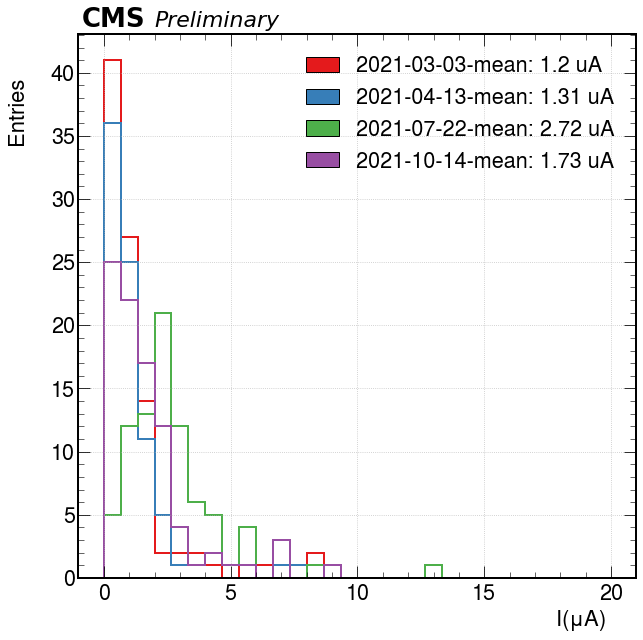

In [8]:
#dates_w2 = np.array(['2020-03-11', '2020-08-29', '2021-03-03', '2021-04-13', '2021-07-22'])
dates_w2 = np.array(['2021-03-03', '2021-04-13', '2021-07-22', '2021-10-14'])
Wminus2 = individual_wheel('W-2', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wminus2, dates_w2, bins=30)

There is no data available for: 2021-07-22


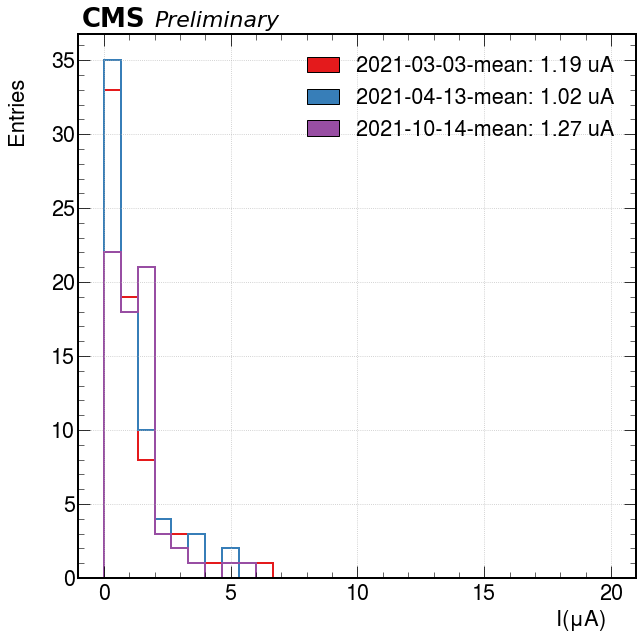

In [10]:
dates_wm1 = np.array(['2021-03-03', '2021-04-13', '2021-07-22', '2021-10-14'])
Wminus1 = individual_wheel('W-1', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wminus1, dates_wm1, bins=30)

There is no data available for: 2021-07-22


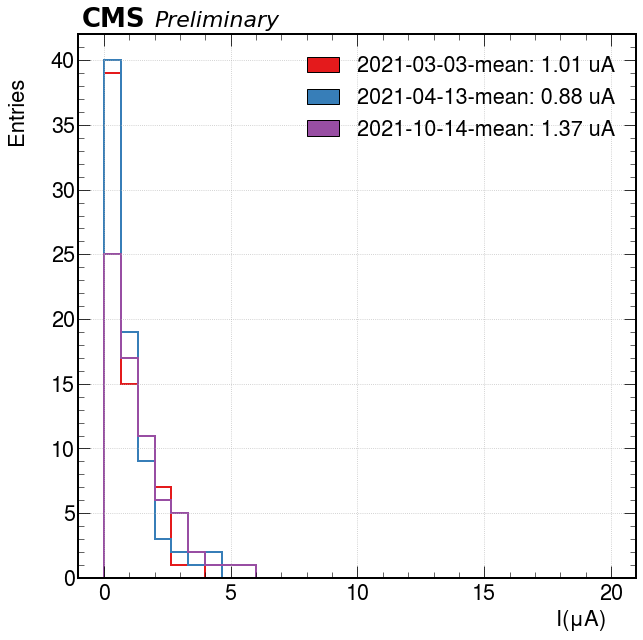

In [11]:
dates_wzero = np.array(['2021-03-03', '2021-04-13', '2021-07-22', '2021-10-14'])
Wzero = individual_wheel('W0', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wzero, dates_wzero, bins=30)

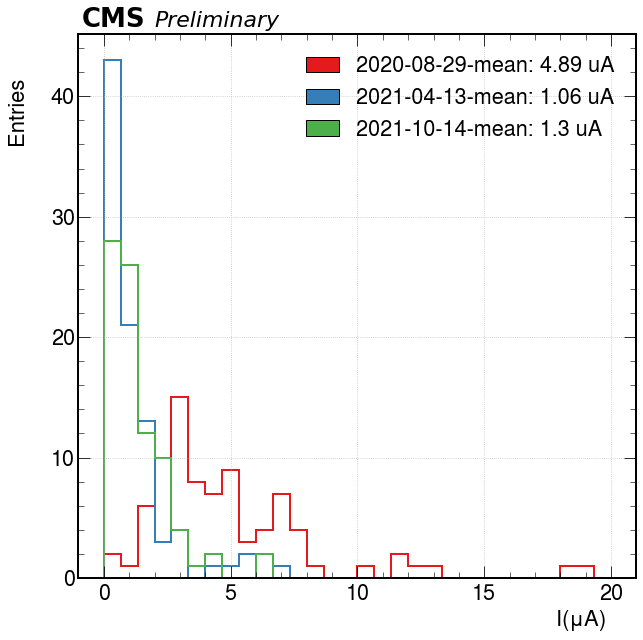

In [14]:
dates_wp1 = np.array(['2020-08-29', '2021-04-13', '2021-10-14'])
Wplus1 = individual_wheel('W+1', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wplus1, dates_wp1, bins=30) 

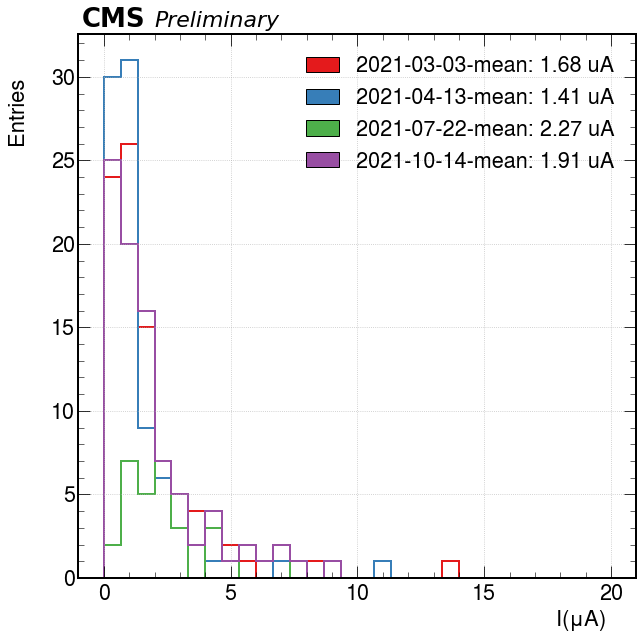

In [15]:
dates_wp2 = np.array(['2020-08-29', '2021-04-13', '2021-10-14'])
Wplus2 = individual_wheel('W+2', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wplus2, dates_w2, bins=30)

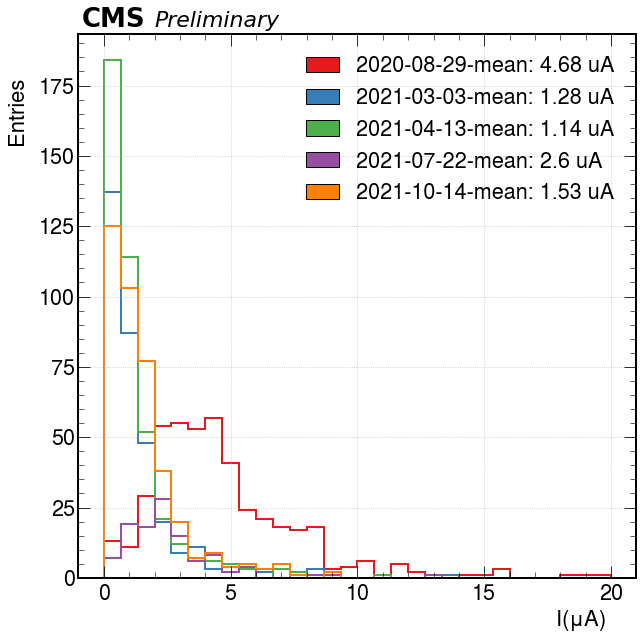

In [19]:
### All wheels
dates_rest = np.array(['2020-08-29', '2021-03-03', '2021-04-13', '2021-07-22', '2021-10-14'])
AllWheels = individual_wheel('W', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(AllWheels, dates_rest, bins=30)

In [22]:
##################################### Endcap #####################################

dates_ed = np.array(['2021-03-03', '2021-04-13', '2021-07-16', '2021-10-14'])

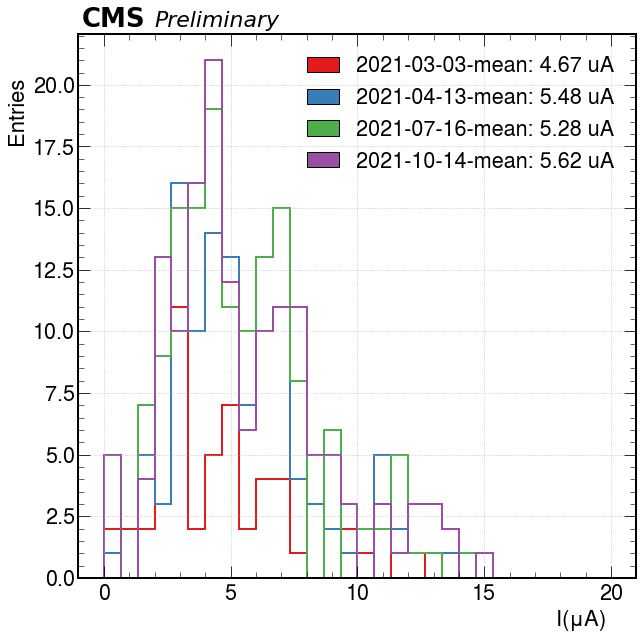

In [23]:
REplus = select_endcap('RE+', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(REplus, dates_ed, bins=30)

There is no data available for: 2021-03-03


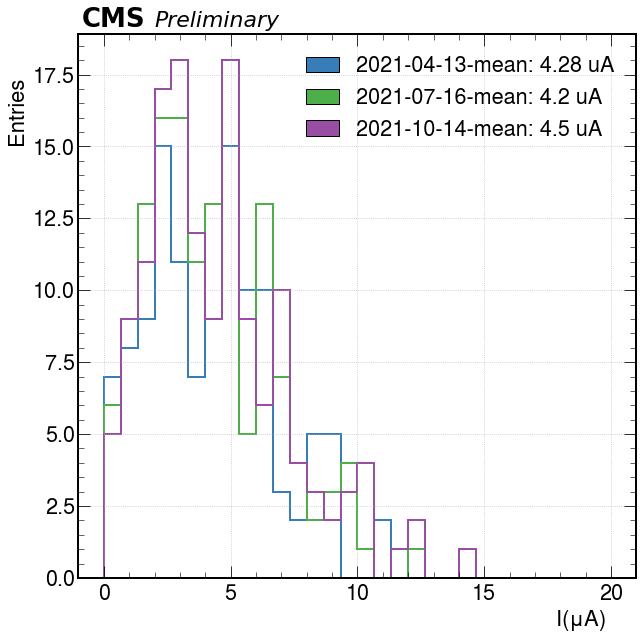

In [24]:
REminus = select_endcap('RE-', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(REminus, dates_ed, bins=30)

There is no data available for: 2021-04-13


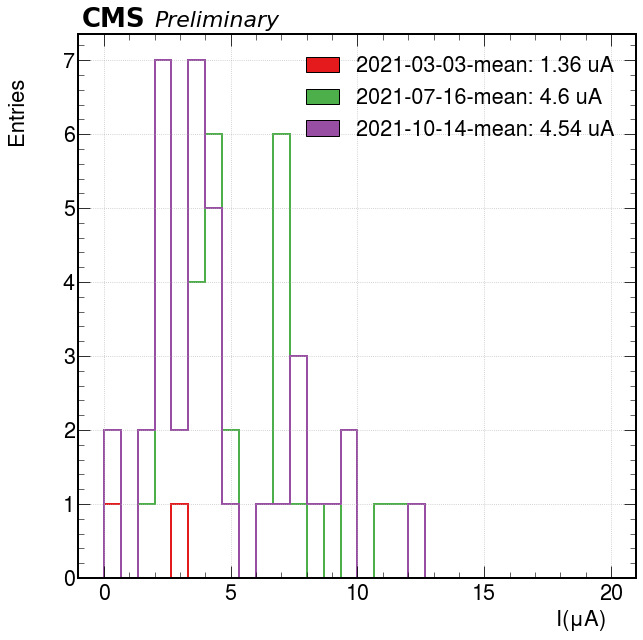

In [25]:
REplus4 = select_endcap('RE+4', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(REplus4, dates_ed, bins=30)

There is no data available for: 2021-03-03


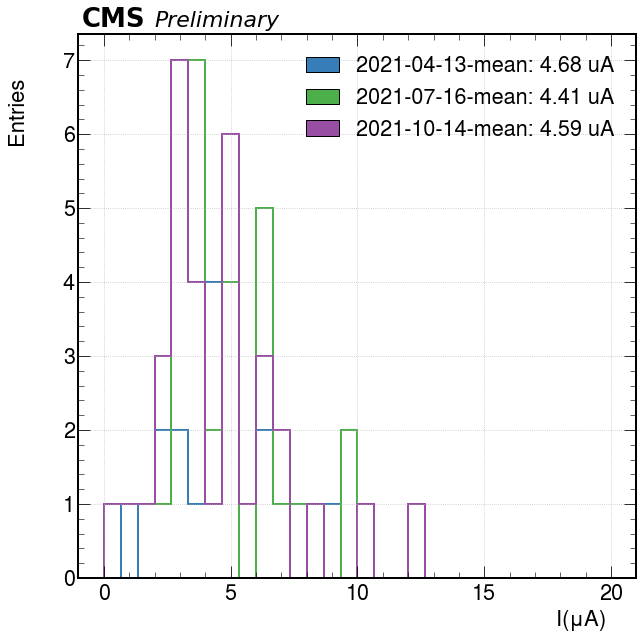

In [26]:
#dates_ed = np.array(['2018-09-20', '2020-08-29', '2021-03-03', '2021-04-13', '2021-07-16'])
REminus4 = select_endcap('RE-4', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(REminus4, dates_ed, bins=30)

In [75]:
############################ Date test ####################################

# Path for the data

data_path = "october_2021.csv"

# Transform the .csv in a panda dataframe
df_data = pd.read_csv(data_path, parse_dates=True)

# Mapping between dpid and chamber name
mapping_file_path = "RPC_Chamber_HV_Map.csv"
df_mapping = pd.read_csv(mapping_file_path, parse_dates=True)

voltage = 8000

In [76]:
date = np.array(['2021-10-14'])

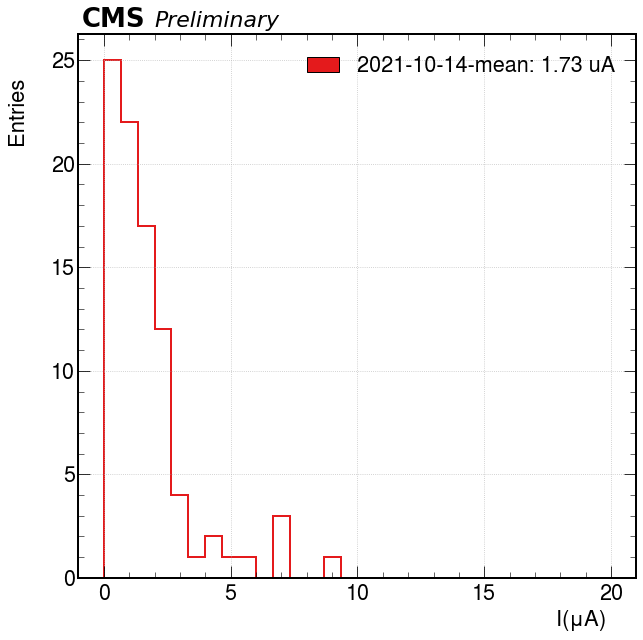

In [77]:
Wminus2 = individual_wheel('W-2', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wminus2, date, bins=30)

In [ ]:
Wminus1 = individual_wheel('W-1', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wminus1, date, bins=30)

In [ ]:
Wzero = individual_wheel('W0', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wzero, date, bins=30)

In [ ]:
Wplus1 = individual_wheel('W+1', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wplus1, date, bins=30)

In [ ]:
Wplus2 = individual_wheel('W+2', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(Wplus2, date, bins=30)

In [ ]:
### All wheels
AllWheels = individual_wheel('W', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(AllWheels, date, bins=30)

In [ ]:
REplus = select_endcap('RE+', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(REplus, date, bins=30)

In [ ]:
REminus = select_endcap('RE-', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(REminus, date, bins=30)

In [ ]:
REplus4 = select_endcap('RE+4', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(REplus4, date, bins=30)

In [ ]:
REminus4 = select_endcap('RE-4', voltage, df_data = convert_dpid_name(df_data, df_mapping))
plot(REminus4, date, bins=30)

In [ ]:
REminus4 = select_endcap('RE+1', voltage, df_data = convert_dpid_name(df_data, df_mapping))
REminus4

In [ ]:
data_path = "newwww.csv"

# Transform the .csv in a panda dataframe
df_data = pd.read_csv(data_path, parse_dates=True)

df_data = convert_dpid_name(df_data, df_mapping)
df_data = df_data[(df_data.V_APPLIED == voltage)]

region = 'RE-4'

df_endcap = df_data[np.where(df_data['Chamber_name'].str.find(region) == 0, True, False) == True]
df_endcap

In [ ]:
df_data = convert_dpid_name(df_data, df_mapping)

In [ ]:
df_endcap = df_data[np.where(df_data['Chamber_name'].str.find('RE-4') == 0, True, False) == True]

In [ ]:
df_date_to_plot = df_endcap[np.where(df_endcap['DATE'].str.find('2021-07-16') == 0, True, False) == True]

In [ ]:
df_date_to_plot_volt = df_date_to_plot[(df_date_to_plot.V_APPLIED == 8000)]

In [ ]:
df_date_to_plot_volt